# PROBLEM SET 3

## Question 3 Python

In [1]:
#Step 1
import pandas as pd
import numpy as np

In [13]:
#Step 2

#first, create 3 different arrays of random numbers, each of length 100
#then create series for each array

#random number from 1 to 4
array1 = np.random.randint(1,4,size=100)
s1 = pd.Series(array1)

#random number from 1 to 3
array2 = np.random.randint(1,3,size=100)
s2 = pd.Series(array2)

#random number from 10,000 to 30,000
array3 = np.random.randint(10000,30000,size=100)
s3 = pd.Series(array3)


In [59]:
#Step 3

#Create DataFrame
df = pd.DataFrame({'k1':s1,'k2':s2,'k3':s3})

df

,k1,k2,k3
0,2,2,24309
1,3,1,20339
2,2,1,19213
3,2,2,16916
4,3,2,28247
...,...,...,...
95,2,2,26231
96,2,1,14863
97,3,2,21107
98,1,2,15504


In [60]:
#Step 4

df.columns = ['bedrs','bathrs','price_sqr_meter']

df

,bedrs,bathrs,price_sqr_meter
0,2,2,24309
1,3,1,20339
2,2,1,19213
3,2,2,16916
4,3,2,28247
...,...,...,...
95,2,2,26231
96,2,1,14863
97,3,2,21107
98,1,2,15504


In [66]:
#Step 5

#create a one column DataFrame by concatenating the 3 series
bigcolumn = pd.concat([s1,s2,s3])

bigcolumn

0         2
1         3
2         2
3         2
4         3
      ...  
95    26231
96    14863
97    21107
98    15504
99    23175
Length: 300, dtype: int32

In [ ]:
#Step 6
#Yes it's true, if you see above output
#indexing goes to 99, then starts at 1 again and so forth

In [108]:
#Step 7

#reindexing dataFrame using reset_index
#now indexing goes from 0 to 300
bigcolumn.reset_index(drop=True,inplace=True)

bigcolumn

0          2
1          3
2          2
3          2
4          3
       ...  
295    26231
296    14863
297    21107
298    15504
299    23175
Length: 300, dtype: int32

##   


## Question 4 Python

In [458]:
#Step 1

import datetime
import io

import pandas as pd
import numpy as np
import requests

#Step 2
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=r"\s+")
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [459]:
#Step 3
newdata=data
newdate = data.Yr.astype(str)+'-'+data.Mo.astype(str)+'-'+data.Dy.astype(str)
newdata['Date'] = newdate

In [460]:
data['Date']=pd.to_datetime(newdata['Date'],format='%y-%m-%d')
data['Date']

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Date, Length: 6574, dtype: datetime64[ns]

In [461]:
#Step4
data['Date'][1]- timedelta(days = 36525)

Timestamp('1961-01-02 00:00:00')

In [462]:
def fixDate(x):
    if x.year > 2000:
        return x - timedelta(days = 36525)
    else:
        return x

In [463]:
data['Date'].apply(fixDate)

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Date, Length: 6574, dtype: datetime64[ns]

In [464]:
#Step 5
data['Date'] = data['Date'].apply(fixDate)
data.set_index('Date', inplace=True)
data.drop(['Yr','Mo','Dy'],axis=1,inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [465]:
#Step 6
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [467]:
#Step 7
data.notnull().sum().sum()

78857

In [469]:
#Step 8
mean = data.mean().mean()
print(mean)

10.227982360836924


In [479]:
#Step 9
minwind = data.min()
maxwind = data.max()
meanwind = data.mean()
stdwind = data.std()

In [481]:
loc_stats = pd.DataFrame({'min':minwind,'max':maxwind, 'mean':meanwind, 'std':stdwind})
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [488]:
#Step 10
min = data.min(axis=1)
max = data.max(axis=1)
mean = data.mean(axis=1)
std = data.std(axis=1)


In [490]:
day_stats = pd.DataFrame({'min':min,'max':max, 'mean':mean, 'std':std})
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [523]:
#Step 11

df_jan = data[data.index.month == 1]
df_jan.mean()[:-1]

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [514]:
#Step 12

data['Year'] = data.index.year
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Year
Date,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978


In [518]:
names = data.columns[:-1]
data.groupby('Year')[names].agg('mean')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Year,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


## Question 5

In [280]:
#step 1
import pandas as pd
import numpy as np

#step 2 & 3
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [291]:
#step 5
num_rows = len(chipo.index)
print('The number of observations in the dataset is:', num_rows)

The number of observations in the dataset is: 4622


In [293]:
#step 6
num_col = len(chipo.columns)
print('The number of columns in the dataset is:', num_col)

The number of columns in the dataset is: 5


In [294]:
#step 7
print(list(chipo))

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [295]:
#step 8

In [309]:
#step 9 & 10
chipo['item_name'].value_counts()[:1]

Chicken Bowl    0.157075
Name: item_name, dtype: float64

In [314]:
#step 11
chipo['choice_description'].value_counts()[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

## Question 6 Python

In [110]:
import pandas as pd 
marriages = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


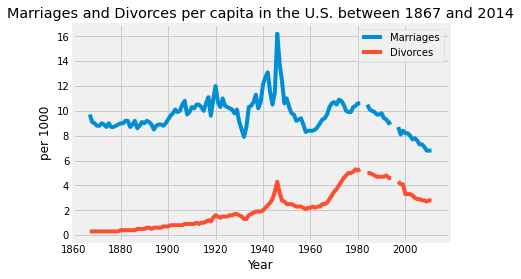

In [427]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(marriages.Year, marriages.Marriages_per_1000, label = 'Marriages')
plt.plot(marriages.Year, marriages.Divorces_per_1000, label = 'Divorces')

plt.title('Marriages and Divorces per capita in the U.S. between 1867 and 2014')
plt.xlabel('Year')
plt.ylabel('per 1000')
plt.legend()
plt.show()

##   


## Question 7 Python

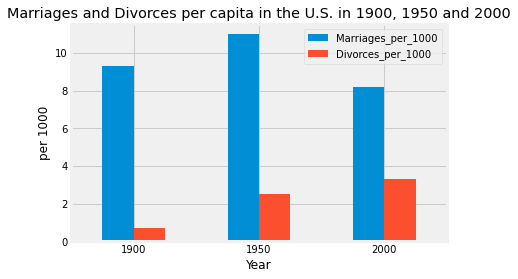

In [229]:
m_d_years = marriages[marriages['Year'].isin([1900, 1950, 2000])]
[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
m_d_years[['Marriages_per_1000', 'Divorces_per_1000']].plot.bar()

plt.title('Marriages and Divorces per capita in the U.S. in 1900, 1950 and 2000')
plt.xlabel('Year')
plt.ylabel('per 1000')
plt.legend()
plt.xticks([0, 1, 2], ['1900', '1950', '2000'], rotation=0)
plt.show()

## Question 8 Python

In [136]:
import pandas as pd
import numpy as np

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

hollywood = pd.read_csv('actor_kill_counts.csv')
hollywood.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


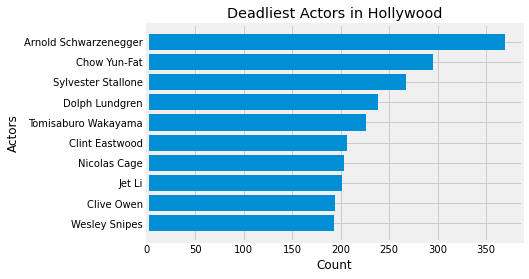

In [231]:
plt.barh(hollywood.Actor, hollywood.Count)
hollywood = hollywood.sort_values('Count', ascending = True)

plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Count')
plt.ylabel('Actors')
plt.show()

## Question 9 Python

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
emperors = pd.read_csv('roman-emperor-reigns.csv')
emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


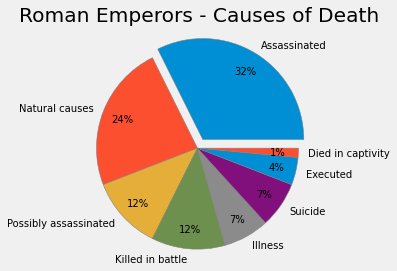

In [439]:
x = emperors['Cause_of_Death'].value_counts()
exp = [0.1,0,0,0,0,0,0,0]
labels = ['Assassinated', 'Natural causes', 'Possibly assassinated', 'Killed in battle', 'Illness', 'Suicide', 'Executed', 'Died in captivity']
plt.pie(x, labels = labels, wedgeprops={'edgecolor':'grey'}, explode = exp, autopct = '%.0f%%', textprops={'fontsize':10}, pctdistance=.8)
plt.title('Roman Emperors - Causes of Death')
plt.axis('equal')
plt.show()

## Question 10 Python

In [243]:
phd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
phd.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


Text(0.5, 1.0, 'Total Revenue Earned by Arcades vs. Computer Science Phds Awarded \nfrom 2000 to 2009')

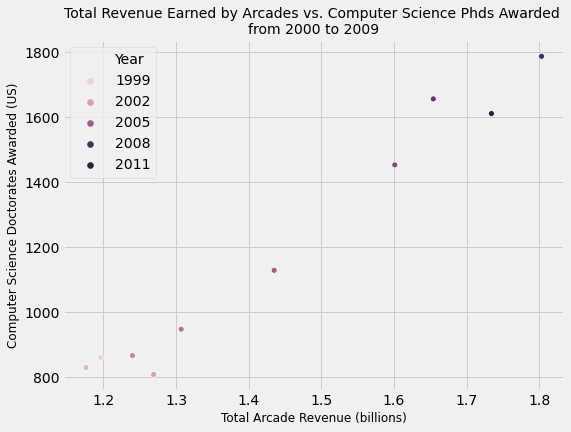

In [443]:
import seaborn as sns
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
palette = ['green', 'orange', 'brown', 'dodgerblue', 'red']
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue = 'Year', ax = ax, data=phd,)
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)
plt.title('Total Revenue Earned by Arcades vs. Computer Science Phds Awarded \nfrom 2000 to 2009', fontsize=14)

## The End